In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import joblib


Cargamos nuestro dataset

In [7]:
df = pd.read_csv('handson-ml/datasets/housing/housing.csv')

Exploracion de datos

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Informacion acerca de las features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Valores nulos

In [12]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Histogramas de las variables numéricas

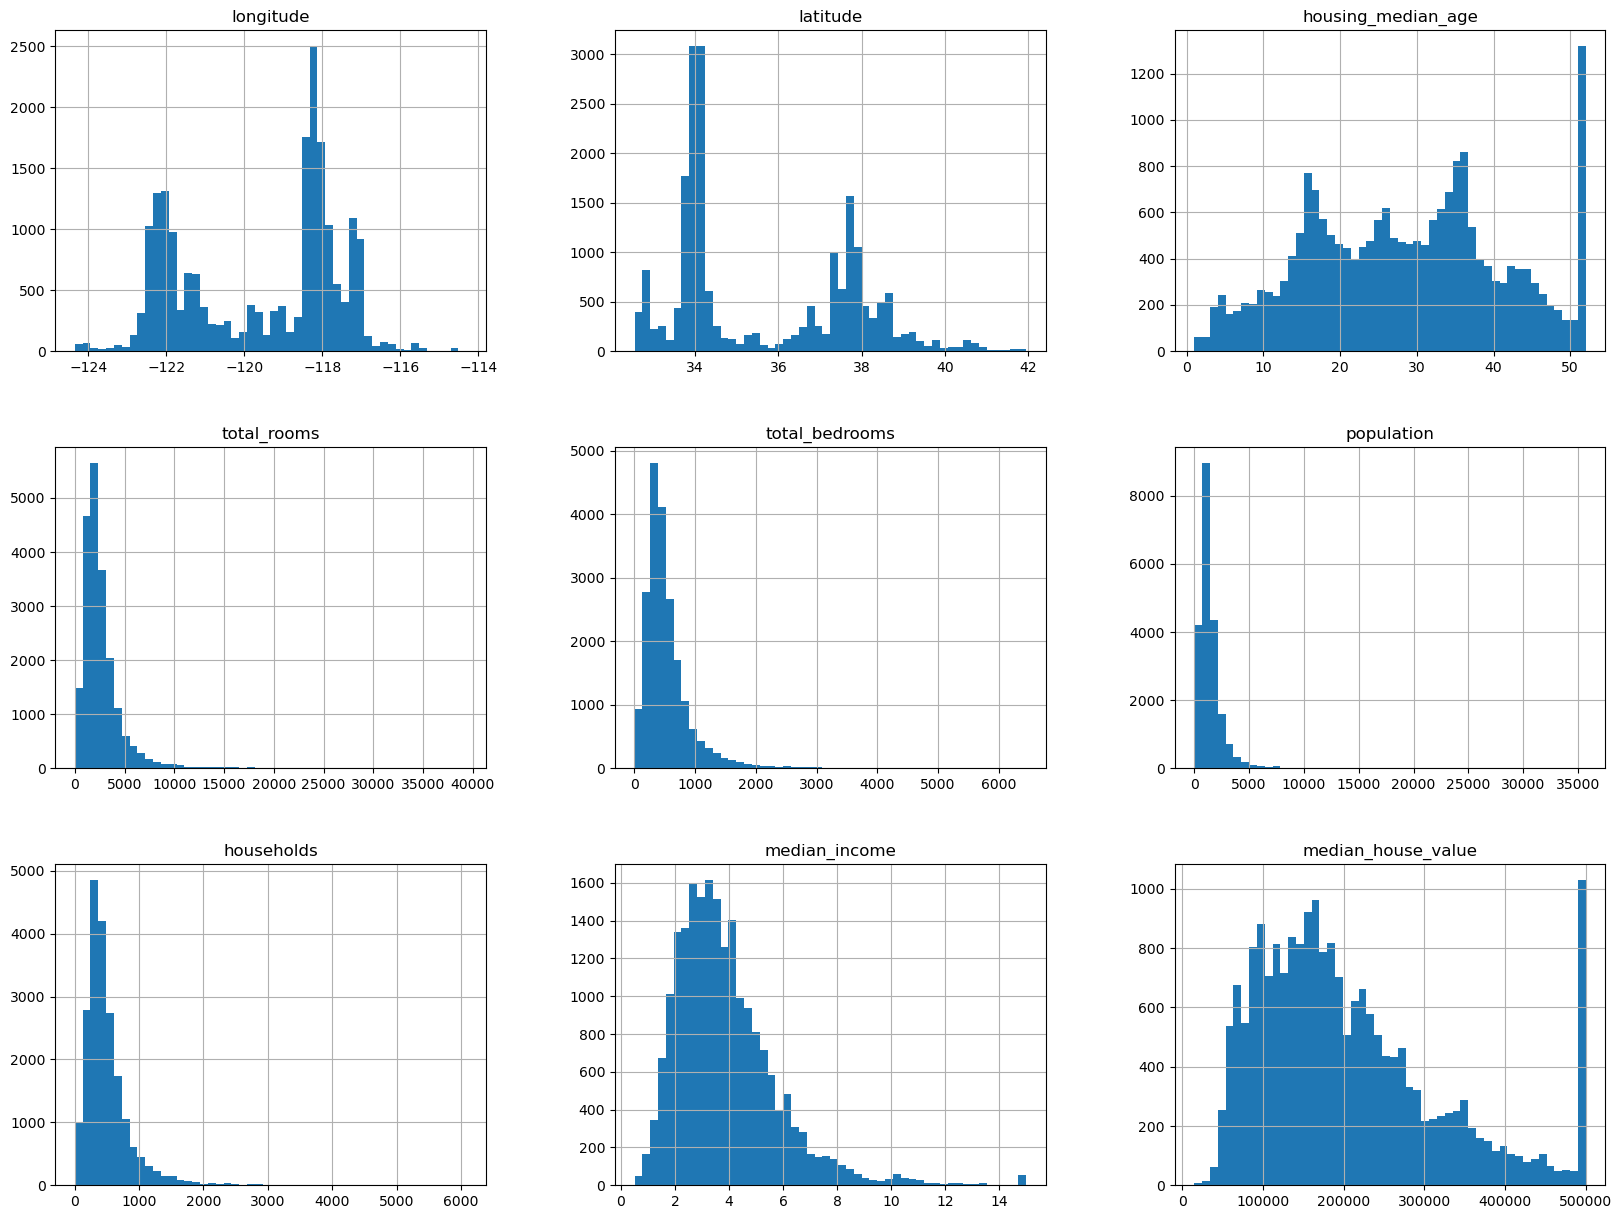

In [13]:
df.hist(bins= 50, figsize= (20, 15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

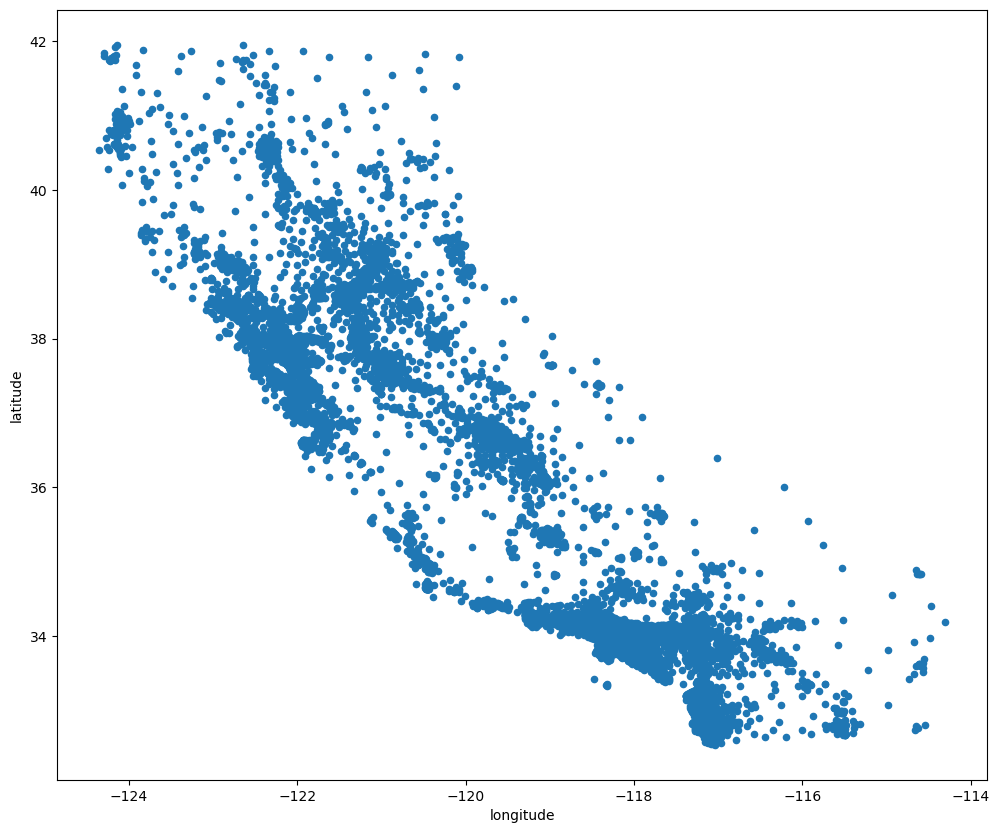

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,10))

<Axes: xlabel='longitude', ylabel='latitude'>

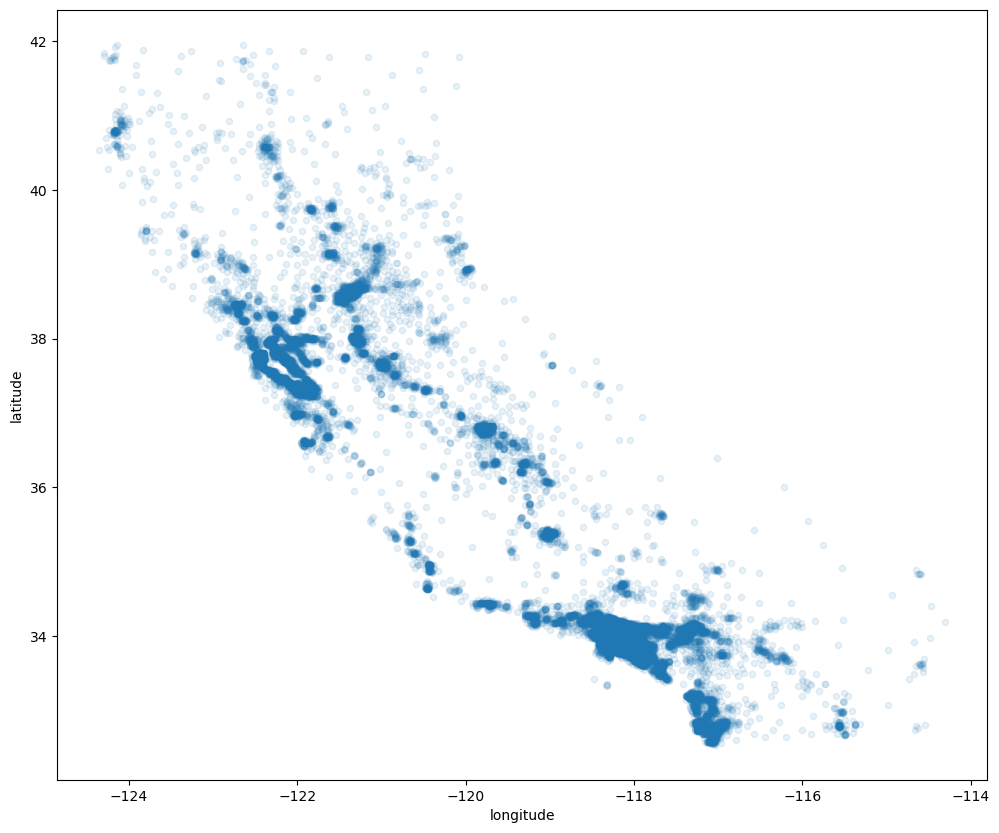

In [15]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize= (12,10))

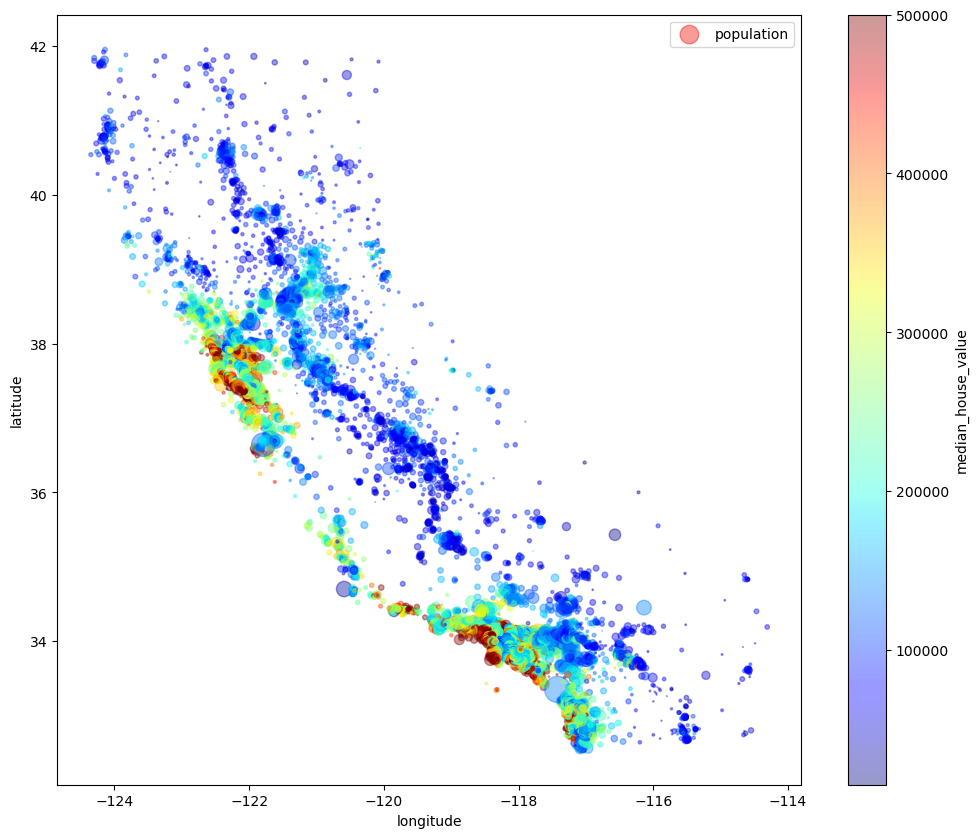

In [16]:

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=df["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
         figsize= (12, 10)
     )
plt.legend()

Matriz de correlación

In [17]:
corr_matrix= df.iloc[:, 1:9].corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
latitude             -0.144160
Name: median_house_value, dtype: float64

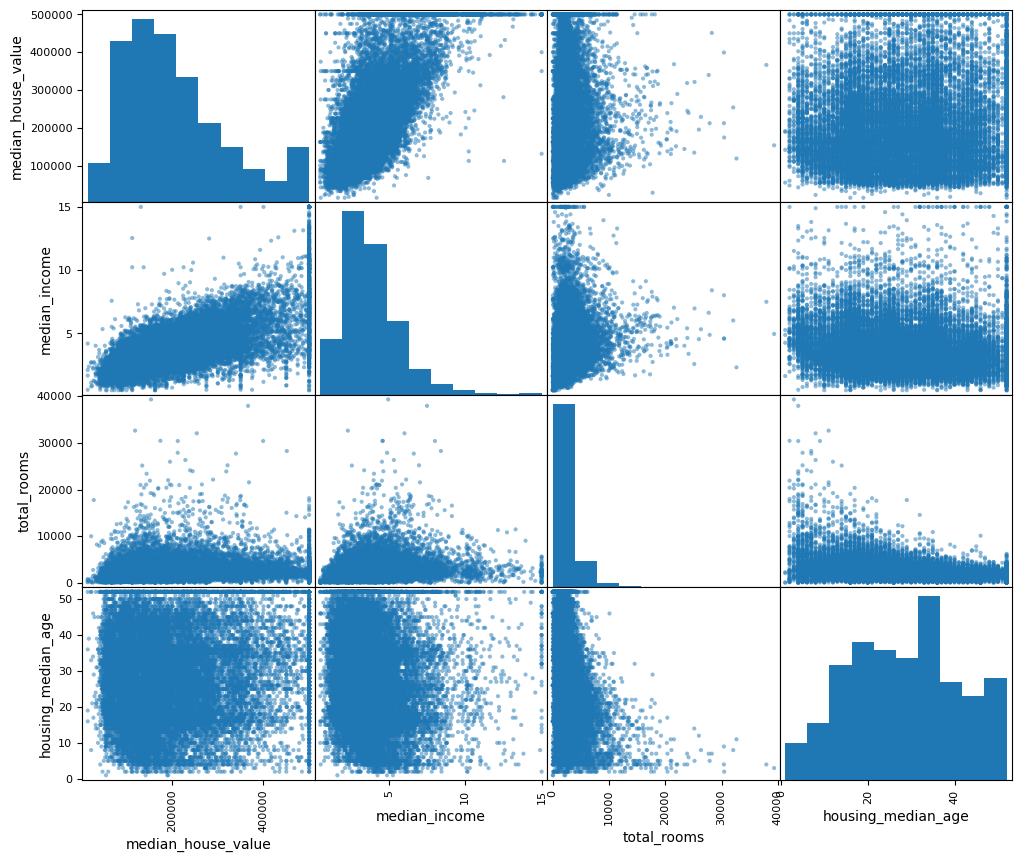

In [19]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

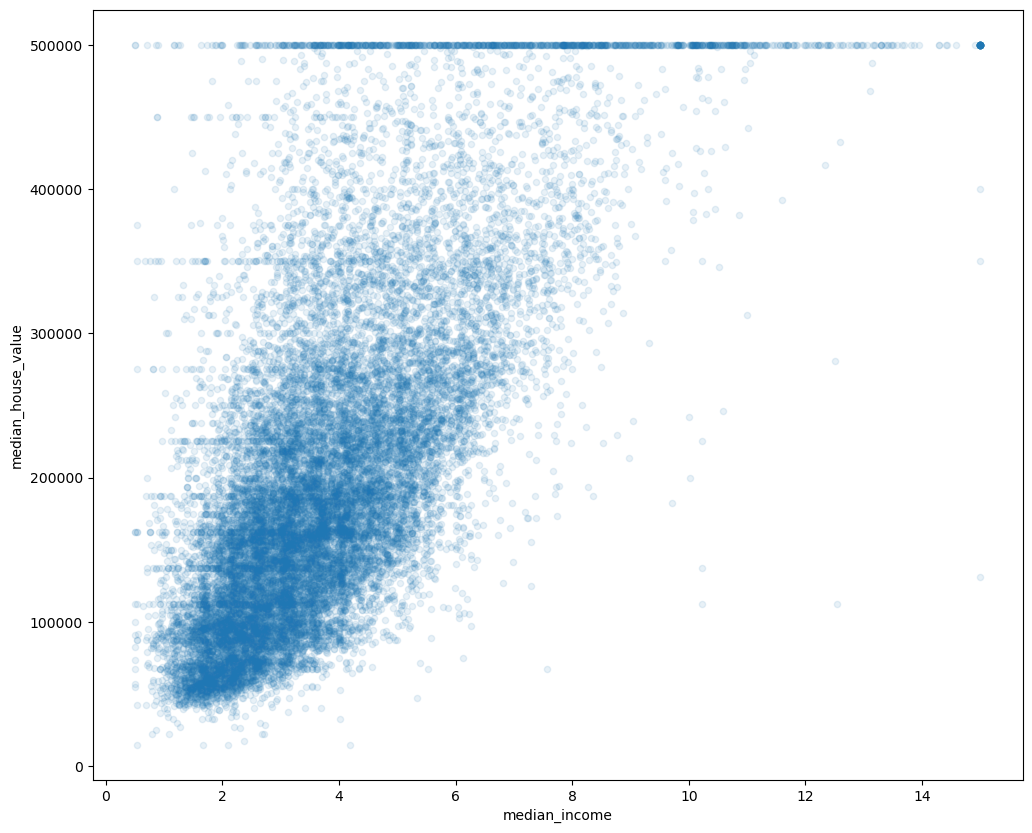

In [20]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1, figsize= (12,10))

Creacion de nuevas variables

In [21]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [22]:
ohe = OneHotEncoder(sparse_output= False)
imputer = SimpleImputer(strategy= 'mean')
sc = StandardScaler()

Separate data types, numerical and string (objects)

In [23]:
numerics = df.drop(columns= 'median_house_value').select_dtypes(include=np.number).columns
categorical = df.select_dtypes(include='object').columns

Pipelines

In [24]:
#### Pipelina numerico
num_pipeline = make_pipeline(
    imputer,
    sc
)


#### Pipelina para objects
cat_pipeline = make_pipeline(
    ohe
)

Column transformer

In [25]:
col_t = make_column_transformer(
    (num_pipeline, numerics),
    (cat_pipeline, categorical),
    ('passthrough', ['median_house_value']),
    remainder= 'passthrough',
    verbose_feature_names_out= False,
)

In [26]:
col_t.set_output(transform= "pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['ocean_proximity'], dtype='object')),
                                ('passthrough', 'passthrough',
                                 ['median_house_value'])],
                  verbose_feature_names_out=False)

Aplicamos nuestro column transformer a nuestro dataframe

In [27]:
df_col_t = col_t.fit_transform(df)
df_col_t.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-0.155023,0.200829,-0.049110,0.0,1.0,0.0,0.0,0.0,78100.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,0.276881,0.037601,0.005021,0.0,1.0,0.0,0.0,0.0,77100.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.090318,0.036994,-0.071735,0.0,1.0,0.0,0.0,0.0,92300.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-0.040211,0.118802,-0.091225,0.0,1.0,0.0,0.0,0.0,84700.0
20639,-0.833696,1.750146,-1.004309,0.068408,0.186352,-0.033977,0.079672,-0.780129,-0.070443,0.141205,-0.043682,0.0,1.0,0.0,0.0,0.0,89400.0


Seleccion de variables independientes y la variable objetivo

In [28]:
X = df_col_t.drop(columns='median_house_value')
y = df_col_t.median_house_value

Separacion de conjuntos de test y training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Models

Regresion lineal

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr.score(X_train, y_train)*100

65.60478290662047

In [33]:
y_pred = lr.predict(X_test)

Decision tree

In [35]:
tree_reg = DecisionTreeRegressor()

In [36]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
tree_reg.score(X_train, y_train)

1.0

Predicciones

In [38]:
y_pred = tree_reg.predict(X_test)

In [40]:
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69730.44765022991

In [41]:
scores = cross_val_score(tree_reg, X_test, y_pred, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", round(scores.mean(), 2))
    print("\nStandard deviation:", round(scores.std(), 2))

In [42]:
display_scores(tree_rmse_scores)

Scores: [74217.5783872  81377.5266931  82571.48908326 76496.058226
 81438.01435415 79035.80676252 80523.35462335 74640.25891413
 79367.56262774 75014.87127765]

Mean: 78468.25

Standard deviation: 2966.67


Random Forest Regressor

In [43]:
forest_reg = RandomForestRegressor()

In [44]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
forest_reg.score(X_train, y_train)*100

97.38076087686579

In [46]:
y_pred = forest_reg.predict(X_test)

In [47]:
scores = cross_val_score(forest_reg, X_test, y_pred, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [48]:
display_scores(forest_rmse_scores)

Scores: [19649.33904824 20113.28648352 20830.2635169  18073.83743808
 19064.68139826 19716.77761853 20107.78995947 18281.44098279
 19012.79721346 18784.95573521]

Mean: 19363.52

Standard deviation: 827.96


Ejercicio de prediccion en todo el dataset para compararlo con los valores reales

In [50]:
preds = forest_reg.predict(df_col_t.drop(columns= 'median_house_value'))

Pegamos las predicciones en el dataset original

In [51]:
df['predictions'] = preds

In [52]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,predictions
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,414810.19
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,382553.11
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,383640.12
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,339872.05
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,296524.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,75330.00
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,76882.00
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,89685.00
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,94641.00


Finalmente guardamos nuestro modelo

In [ ]:
joblib.dump(forest_reg, "forest_reg_housing.pkl")

Y para cargar el modelo entrenado, sería de la siguiente manera. Esto se hace para no tener que escalar los datos para entrenar el modelos nuevamente. Hay ocasiones en que un modelo puede tardar horas para entrenarse, y justo guardando nuestro modelo entrenado evitamos esas pérdidas de tiempo.

In [4]:
forest_reg = joblib.load("forest_reg_housing.pkl")

Una vez que ya tengamos nuestro modelo guardado podremos usarlo después sin tener que volver a realizar el proceso de seleccion de variables, escalar variables y entrenarlo. Lo unico que necesitamos son los nuevos datos y realizar predicciones. lo unic que debemos tomar en cuenta es que nuestro modelo fue entrenado con datos escalados, entonces eso signifca que nuestra new data debe estar escalada para poder hacer predicciones

In [ ]:
### por ejemplo

new_df = pd.read_csv("new_data.scsv")

### Escalamos variables
### aplicamos predict con nuestro model previamente entrenado

forest_reg.predict(new_df.drop(columns= 'median_house_value'))